In [7]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
sanjuan_dataset = pd.read_csv("../../dengueData/SanJuan/san_juan_training_data.csv")
print(sanjuan_dataset.head())
print("Number of observations: ", len(sanjuan_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  1990/1991            1      1990-04-30            0            0   
1  1990/1991            2      1990-05-07            0            0   
2  1990/1991            3      1990-05-14            0            0   
3  1990/1991            4      1990-05-21            0            0   
4  1990/1991            5      1990-05-28            0            0   

   denv3_cases  denv4_cases  other_positive_cases  additional_cases  \
0            0            0                     4                 0   
1            0            0                     5                 0   
2            0            0                     4                 0   
3            0            0                     3                 0   
4            0            0                     6                 0   

   total_cases  
0            4  
1            5  
2            4  
3            3  
4            6  
Number of observations:  988


In [9]:
sanjuan_cases = sanjuan_dataset["total_cases"].values
print(sanjuan_cases.shape)

(988,)


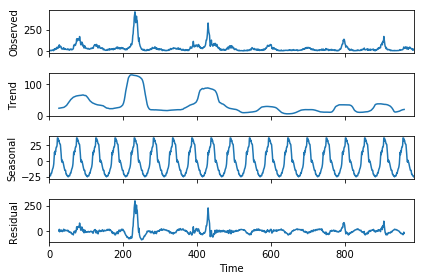

In [10]:
sm.tsa.seasonal_decompose(sanjuan_cases, freq = 52).plot()
# result = sm.tsa.stattools.adfuller(sanjuan_cases)
# print(result)
print("")

In [25]:
split_index = int(len(sanjuan_cases)* 0.7)
future_steps = 3
window_size = 4
train = sanjuan_cases[:split_index]

#Test goes from train to end - future_steps (as this data will be feed into the model)
#Expected is always future_steps ahead of test as this is the expected predictions
test = sanjuan_cases[split_index+window_size-1:-future_steps]
expected = sanjuan_cases[split_index+future_steps+window_size-1:]

print(test[-5:])
print(expected[-5:])
print(train.shape)
print(test.shape)
print(expected.shape)
print(sanjuan_cases[-5:])


[28 22 26 24  9]
[24  9 21 10 15]
(691,)
(291,)
(291,)
[24  9 21 10 15]


predicted=23.659106, expected=37.000000
predicted=23.971749, expected=41.000000
predicted=32.719605, expected=34.000000
predicted=30.514486, expected=30.000000
predicted=38.129416, expected=39.000000
predicted=38.038494, expected=39.000000
predicted=37.749520, expected=39.000000
predicted=33.964568, expected=34.000000
predicted=42.079467, expected=30.000000
predicted=39.040753, expected=37.000000
predicted=40.483298, expected=29.000000
predicted=37.043747, expected=26.000000
predicted=31.409368, expected=15.000000
predicted=35.536444, expected=22.000000
predicted=27.505413, expected=15.000000
predicted=22.536483, expected=20.000000
predicted=17.103589, expected=14.000000
predicted=21.793609, expected=10.000000
predicted=10.461292, expected=21.000000
predicted=21.805856, expected=14.000000
predicted=17.596979, expected=14.000000
predicted=11.630386, expected=9.000000
predicted=19.489209, expected=11.000000
predicted=14.095421, expected=5.000000
predicted=15.666686, expected=6.000000
pre

predicted=94.883733, expected=101.000000
predicted=73.882151, expected=170.000000
predicted=114.267629, expected=135.000000
predicted=107.933978, expected=106.000000
predicted=104.040825, expected=68.000000
predicted=170.432361, expected=48.000000
predicted=142.012589, expected=48.000000
predicted=110.568708, expected=26.000000
predicted=72.889755, expected=33.000000
predicted=45.400055, expected=29.000000
predicted=47.713624, expected=17.000000
predicted=25.188973, expected=12.000000
predicted=29.822971, expected=13.000000
predicted=34.632163, expected=17.000000
predicted=14.452661, expected=15.000000
predicted=11.875372, expected=14.000000
predicted=11.865598, expected=15.000000
predicted=13.556493, expected=10.000000
predicted=16.343059, expected=9.000000
predicted=10.478677, expected=2.000000
predicted=11.529244, expected=6.000000
predicted=12.019766, expected=8.000000
predicted=-0.430325, expected=5.000000
predicted=0.669903, expected=1.000000
predicted=3.758691, expected=2.000000

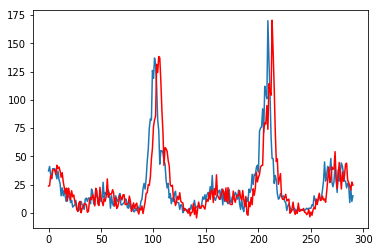

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import time
from statsmodels.tsa.statespace.sarimax import SARIMAX
history = [x for x in train]
predictions = list()
start = time.time()
for t in range(len(test)):
    model = ExponentialSmoothing(np.asarray(history) ,seasonal_periods=int(len(history)/52) ,trend='add', seasonal='add',)
    
    model_fit = model.fit()
    output = model_fit.forecast(steps=future_steps)
    yhat = output[0]
    predictions.append(yhat)
    obs = expected[t]
    history.append(test[t])
    print('predicted=%f, expected=%f' % (yhat, obs))

end = time.time()
print("Total time: ", end-start)
error = mean_squared_error(expected, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(expected)
plt.plot(predictions, color='red')
plt.show()